<img src="img/Logo_OpenClassrooms.png" width=100 />

# OpenClassrooms Projet 5: Segmentez des clients d'un site e-commerce
# Modélisation

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

### Les données
Pour cette mission, Olist vous fournit une base de données anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

### Votre mission
Votre mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper ensemble des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe marketing pour mieux communiquer.

Pour des raisons de confidentialité, Olist ne fournit pas beaucoup de données, à vous de fouiller dans celles dont vous disposez et de créer les meilleures features pour les exploiter.

Enfin, votre client, Olist, a spécifié sa demande ainsi :

- La segmentation proposée doit être exploitable et facile d’utilisation pour l’équipe marketing.
- Vous évaluerez la fréquence à laquelle la segmentation doit être mise à jour, afin de pouvoir effectuer un devis de contrat de maintenance.
- Le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.


# Sommaire
### [Bibliothèques](#bibli)
### [Fonctions](#funcs)
### [Données](#donnees)
### [Centrage des données](#scaling)
### [Analyse en composantes principales](#PCA)

<a id='bibli'></a>
# Import de bibliothèques 📚

In [7]:
import pandas as pd
pd.set_option("mode.chained_assignment", None)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import manifold

<a id='funcs'></a>

# Fonctions ⚙️

<a id='donnees'></a>

# Données 🎁

<img src="img/structure.png" width=500 />

Les données ont été travaillées pour etre rassemblées dans une base propre ayant pour index les ids des clients ayant fait 2 commandes ou plus. Les varaiables ont été crées pour représenter leurs comportemenst, leur satisfactions et leurs expériences

In [4]:
data = pd.read_csv("data/customer_data.csv", index_col=[0])

In [5]:
data.head()

,nb_orders,days_since_first_order,days_since_last_order,frequency,sum_orders,nb_reviews,average_review_score,average_delivery_time,delay_rate,advance_rate,...,stationery,tablets_printing_image,telephony,toys,watches_gifts,cash,credit_card,debit_card,not_defined,voucher
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
00172711b30d52eea8b313a7f2cced02,2,81,65,0.751543,74.50,2.0,4.0,11,0.0,1.0,...,1,0,0,0,0,0,0,0,0,1
004288347e5e88a27ded2bb23747066c,2,447,276,0.136186,317.89,2.0,5.0,7,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
004b45ec5c64187465168251cd1c9c2f,2,411,143,0.148114,86.90,2.0,3.0,22,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
0058f300f57d7b93c477a131a59b36c3,2,240,208,0.253646,132.48,2.0,3.0,13,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
00a39521eb40f7012db50455bf083460,2,146,136,0.416952,81.45,2.0,4.0,18,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
data.shape

(2997, 81)

<a id='scaling'></a>
# Centrage des données 📊

D'après la théorie de l'analyse en composante principale, pour pouvoir projeter nos données dans une base orthonormée de plus faible dimension alors la matrice des données doit être normée elle aussi

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(data)

StandardScaler()

In [11]:
scaler.transform(data).shape

(2997, 81)

In [12]:
data_scale = pd.DataFrame(data=scaler.transform(data), index=data.index, columns=data.columns)

In [13]:
data_scale

,nb_orders,days_since_first_order,days_since_last_order,frequency,sum_orders,nb_reviews,average_review_score,average_delivery_time,delay_rate,advance_rate,...,stationery,tablets_printing_image,telephony,toys,watches_gifts,cash,credit_card,debit_card,not_defined,voucher
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
00172711b30d52eea8b313a7f2cced02,-0.224803,-1.852280,-1.398262,3.087087,-0.600943,-0.389069,-0.085903,-0.131181,-0.300228,0.398466,...,10.488088,-0.01827,-0.14293,-0.209493,-0.236697,-0.468807,-1.672866,-0.14293,-0.01827,3.865422
004288347e5e88a27ded2bb23747066c,-0.224803,0.617311,0.053624,-0.585370,0.188105,-0.389069,0.783741,-0.691820,-0.300228,0.398466,...,-0.095346,-0.01827,-0.14293,-0.209493,-0.236697,-0.468807,0.597777,-0.14293,-0.01827,-0.258704
004b45ec5c64187465168251cd1c9c2f,-0.224803,0.374401,-0.861546,-0.514179,-0.560744,-0.389069,-0.955547,1.410577,-0.300228,0.398466,...,-0.095346,-0.01827,-0.14293,-0.209493,-0.236697,2.133073,-1.672866,-0.14293,-0.01827,-0.258704
0058f300f57d7b93c477a131a59b36c3,-0.224803,-0.779425,-0.414282,0.115633,-0.412978,-0.389069,-0.955547,0.149139,-0.300228,0.398466,...,-0.095346,-0.01827,-0.14293,-0.209493,-0.236697,-0.468807,-1.672866,-0.14293,-0.01827,3.865422
00a39521eb40f7012db50455bf083460,-0.224803,-1.413691,-0.909712,1.090245,-0.578412,-0.389069,-0.085903,0.849938,-0.300228,0.398466,...,-0.095346,-0.01827,-0.14293,-0.209493,-0.236697,-0.468807,0.597777,-0.14293,-0.01827,-0.258704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff36be26206fffe1eb37afd54c70e18b,1.711215,-1.852280,-1.467072,5.329693,-0.589921,1.027748,-0.955547,0.008979,-0.300228,-3.952728,...,-0.095346,-0.01827,-0.14293,-0.209493,-0.236697,-0.468807,-1.672866,-0.14293,-0.01827,3.865422
ff44401d0d8f5b9c54a47374eb48c1b8,-0.224803,1.076142,1.698178,-0.692685,-0.713438,-0.389069,-0.955547,0.008979,-0.300228,0.398466,...,-0.095346,-0.01827,-0.14293,-0.209493,-0.236697,-0.468807,-1.672866,-0.14293,-0.01827,3.865422
ff8892f7c26aa0446da53d01b18df463,-0.224803,1.049152,0.383911,-0.687163,0.058623,1.027748,-1.245428,3.512974,2.654544,-1.777131,...,-0.095346,-0.01827,-0.14293,-0.209493,4.224814,-0.468807,0.597777,-0.14293,-0.01827,-0.258704


## FAUT IL APPLIQUER LE SCALE SUR LES COLONNES CATEGORIQUES?? NON

<a id='PCA'></a>
# Analyse en composantes principales ☘️

Sans les données catégoriques

In [24]:
pca_simple = decomposition.PCA(n_components=3)
pca_simple.fit(data_scale.iloc[:, :15])
print(pca_simple.explained_variance_ratio_.cumsum())

[0.17161157 0.33191635 0.45467737]


Avec les données catégoriques

In [25]:
pca = decomposition.PCA(n_components=3)
pca.fit(data_scale)
print(pca.explained_variance_ratio_.cumsum())

[0.03302803 0.06393176 0.08787653]


MAUVAIS RESULTATS PEUT ETRE DUS AU PROBLEME DE SCALING SUR LES CATEGORIES

# t-SNE

Données non standardisées

In [99]:
%%time
tsne = manifold.TSNE(random_state=41)
data_tsne = tsne.fit_transform(data)

Wall time: 9.8 s


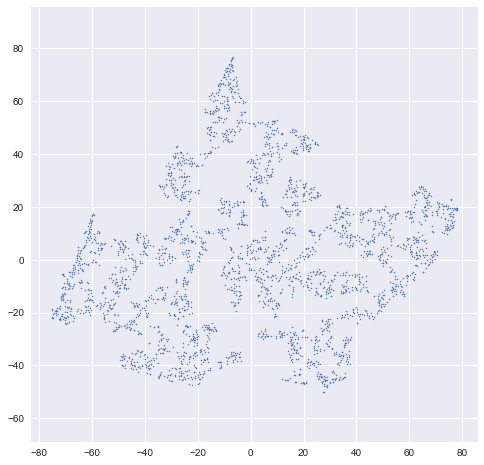

0.8503367900848389


In [100]:
x = [point[0] for point in data_tsne]
y = [point[1] for point in data_tsne]
plt.style.use('seaborn')
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.scatter(x, y, marker='.', s=5)
plt.show()
print(tsne.kl_divergence_)

Données Standardisées

In [101]:
%%time
tsne = manifold.TSNE(init='pca', random_state=41, n_jobs=-1)
data_tsne = tsne.fit_transform(data_scale)

Wall time: 11.7 s


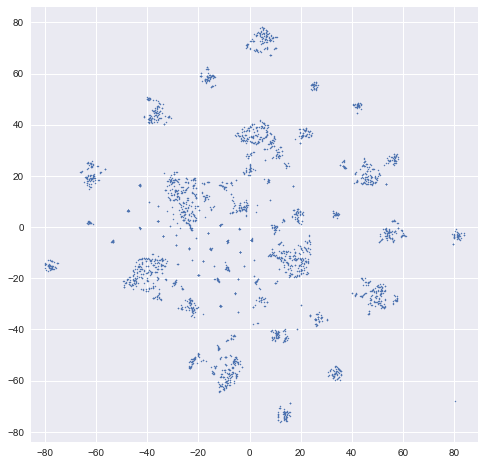

0.5321984887123108


In [102]:
x = [point[0] for point in data_tsne]
y = [point[1] for point in data_tsne]
plt.style.use('seaborn')
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.scatter(x, y, marker='.', s=5)
plt.show()
print(tsne.kl_divergence_)

On voit bien ici l'intéret de travailler sur des données standardisées

Fit un kmeans et colorier les points avec les etiquettes du kmeans et vérifier la cohérence du t-sne vis à vis du kmeans. Ensuite essayer la perplexité

Essayons plusieurs valeurs de perplexité